# 1. Preparação do notebook

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

#2. Geração das séries temporais

## 2.1. Sem outliers

In [6]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

series_dict = {}

for i in range(num_series):
    series = np.cumsum(np.random.normal(0, 1, n))  # Movimento Browniano
    jump_indices = np.random.choice(n, size=int(0.02 * n), replace=False)  # 2% dos pontos terão saltos
    series[jump_indices] += np.random.choice([-50, 50], size=len(jump_indices))  # Saltos positivos e negativos
    series_dict[f"bm_jumps_{i+1}"] = series

# Criar DataFrame com as séries geradas
df = pd.DataFrame(series_dict)
df.head()

,bm_jumps_1,bm_jumps_2,bm_jumps_3,bm_jumps_4,bm_jumps_5,bm_jumps_6,bm_jumps_7,bm_jumps_8,bm_jumps_9,bm_jumps_10
0,0.496714,-1.544434,1.562669,-1.068870,-1.574641,0.600506,0.075905,50.045619,-0.249206,-0.940726
1,0.358450,-2.303156,2.040892,-0.755027,-0.575647,0.936496,0.796740,0.494262,1.344256,0.048010
2,1.006138,-2.215918,1.703143,1.142859,-0.846519,1.197469,0.448800,-0.567930,1.263826,-0.575317
3,2.529168,-1.247409,0.904958,0.761608,-2.947229,-0.223921,0.460505,-1.883760,1.128036,0.474577
4,2.295015,-1.146266,0.172675,0.577442,-3.932071,-48.513417,1.878680,-3.798710,1.336141,0.677151


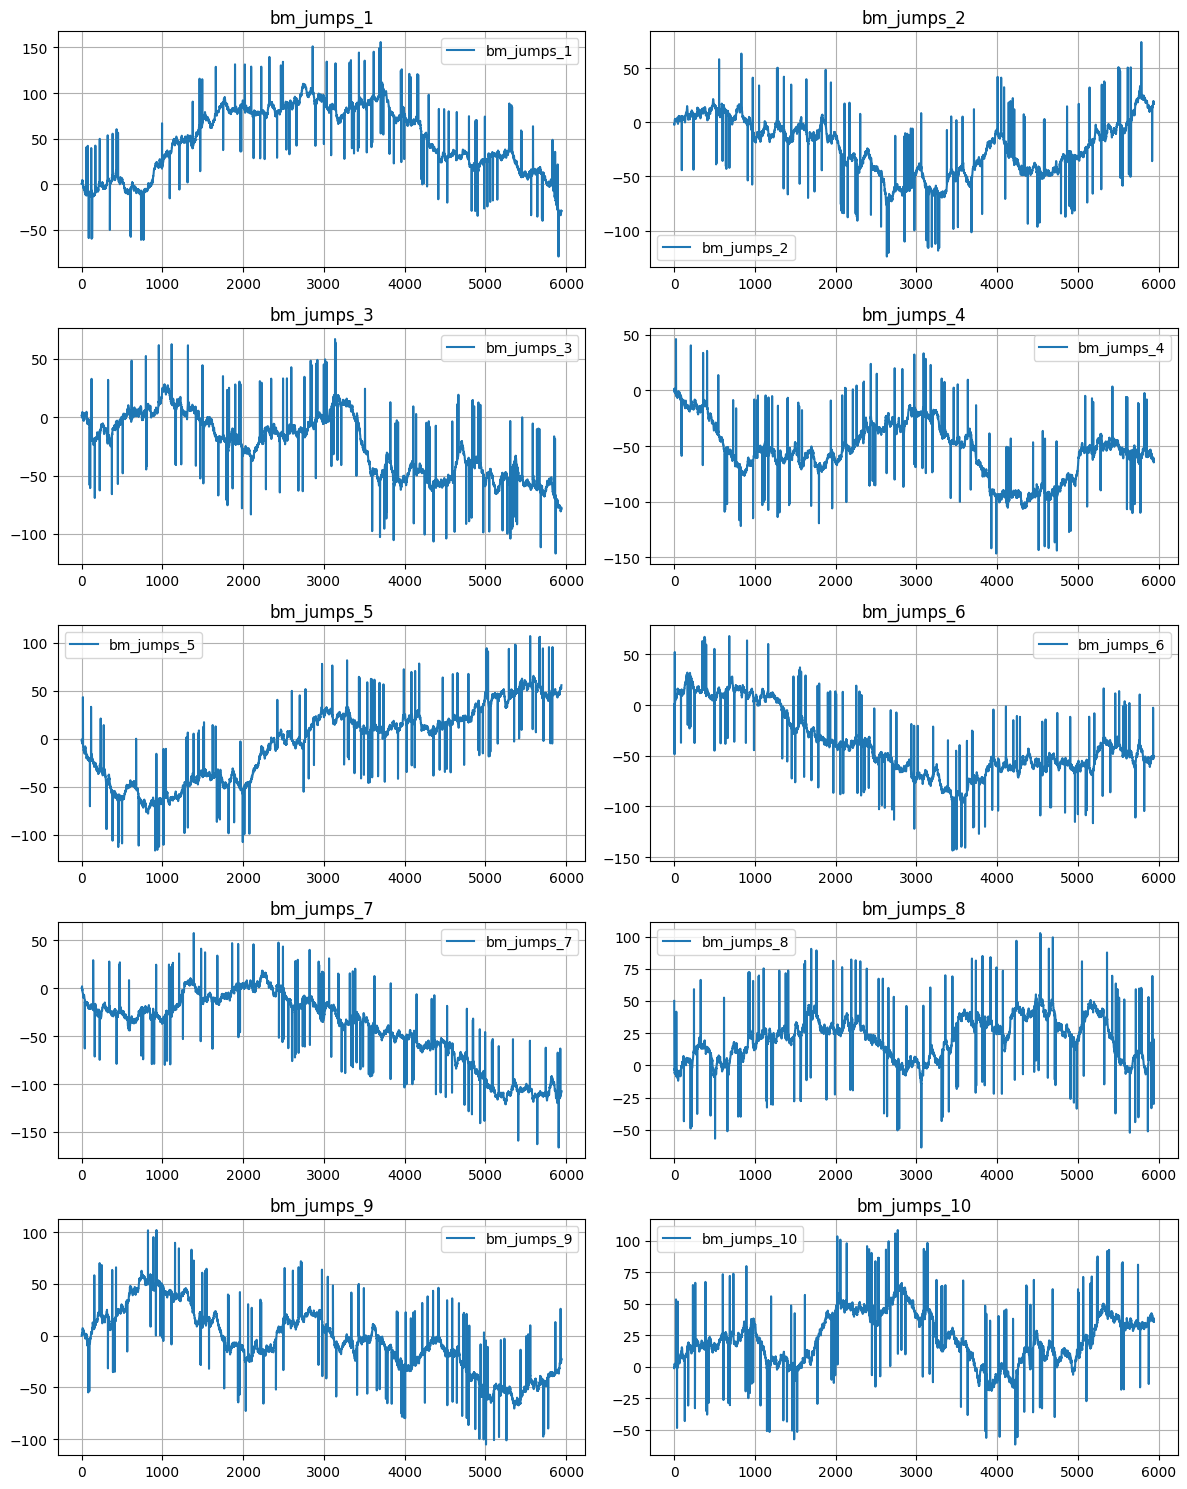

In [7]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [8]:
################################
##### Detecção de outliers #####
################################

# Função para calcular o percentual de outliers usando o método IQR
def calcular_percentual_outliers(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    outliers = (series < lim_inf) | (series > lim_sup)
    return np.mean(outliers) * 100

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df[col]) for col in df.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
bm_jumps_1,0.02
bm_jumps_2,0.22
bm_jumps_3,0.00
bm_jumps_4,0.49
bm_jumps_5,0.00
bm_jumps_6,0.25
bm_jumps_7,0.08
bm_jumps_8,0.99
bm_jumps_9,0.27
bm_jumps_10,0.62


## 2.2. Com outliers

In [9]:
######################
##### Parâmetros #####
######################

n = 5943  # Número de passos (observações)
num_series = 10  # Número total de séries
np.random.seed(42)  # Para reprodutibilidade

############################
##### Séries Temporais #####
############################

series_dict = {}

for i in range(num_series):
    series = np.cumsum(np.random.normal(0, 1, n))  # Movimento Browniano
    jump_indices = np.random.choice(n, size=int(0.02 * n), replace=False)  # 2% dos pontos terão saltos
    series[jump_indices] += np.random.choice([-50, 50], size=len(jump_indices))  # Saltos positivos e negativos
    series_dict[f"bm_jumps_{i+1}"] = series

# Criar DataFrame com as séries geradas
df = pd.DataFrame(series_dict)
df.head()

##############################
##### Adição de outliers #####
##############################

# Função para adicionar outliers em uma série
#def add_outliers(series, outlier_fraction=0.4):
#    n = len(series)
#    num_outliers = int(n * outlier_fraction)  # Total de outliers a serem inseridos

    # Dividir os outliers igualmente entre os quartis
#    quartile_indices = np.array_split(np.random.permutation(n), 4)  # Divisão em quartis

    # Gerar valores de outliers (aumentando ou diminuindo em relação ao valor original)
#    for q_indices in quartile_indices:
#        num_q_outliers = len(q_indices) // 2  # Metade dos índices do quartil serão outliers
#        outlier_indices = np.random.choice(q_indices, num_q_outliers, replace=False)

        # Criar outliers aumentando ou diminuindo os valores em múltiplos do desvio padrão
#        std_dev = np.std(series)
#        series[outlier_indices] += np.random.choice([-1, 1], num_q_outliers) * np.random.uniform(3, 5) * std_dev

#    return series

def add_outliers(series, outlier_fraction=0.05):
    n = len(series)
    num_outliers = int(n * outlier_fraction)  # Definir a quantidade de outliers

    # Selecionar índices aleatórios para inserção dos outliers
    outlier_indices = np.random.choice(n, num_outliers, replace=False)

    # Gerar valores de outliers sem modificar drasticamente a estrutura
    std_dev = np.std(series)
    series[outlier_indices] += np.random.choice([-1, 1], num_outliers) * np.random.uniform(2, 4) * std_dev

    return series

# Aplicar a função de adição de outliers a cada série
df_outliers = df.apply(add_outliers, axis=0)
df_outliers.head()

,bm_jumps_1,bm_jumps_2,bm_jumps_3,bm_jumps_4,bm_jumps_5,bm_jumps_6,bm_jumps_7,bm_jumps_8,bm_jumps_9,bm_jumps_10
0,0.496714,-1.544434,1.562669,-1.068870,-100.752424,0.600506,0.075905,50.045619,-0.249206,-0.940726
1,0.358450,-2.303156,2.040892,-0.755027,-0.575647,0.936496,0.796740,0.494262,1.344256,0.048010
2,1.006138,-2.215918,1.703143,1.142859,-0.846519,1.197469,0.448800,-0.567930,1.263826,-0.575317
3,-135.982789,-1.247409,0.904958,0.761608,-2.947229,-0.223921,0.460505,-1.883760,1.128036,0.474577
4,140.806972,-1.146266,0.172675,0.577442,-3.932071,-48.513417,1.878680,-3.798710,1.336141,0.677151


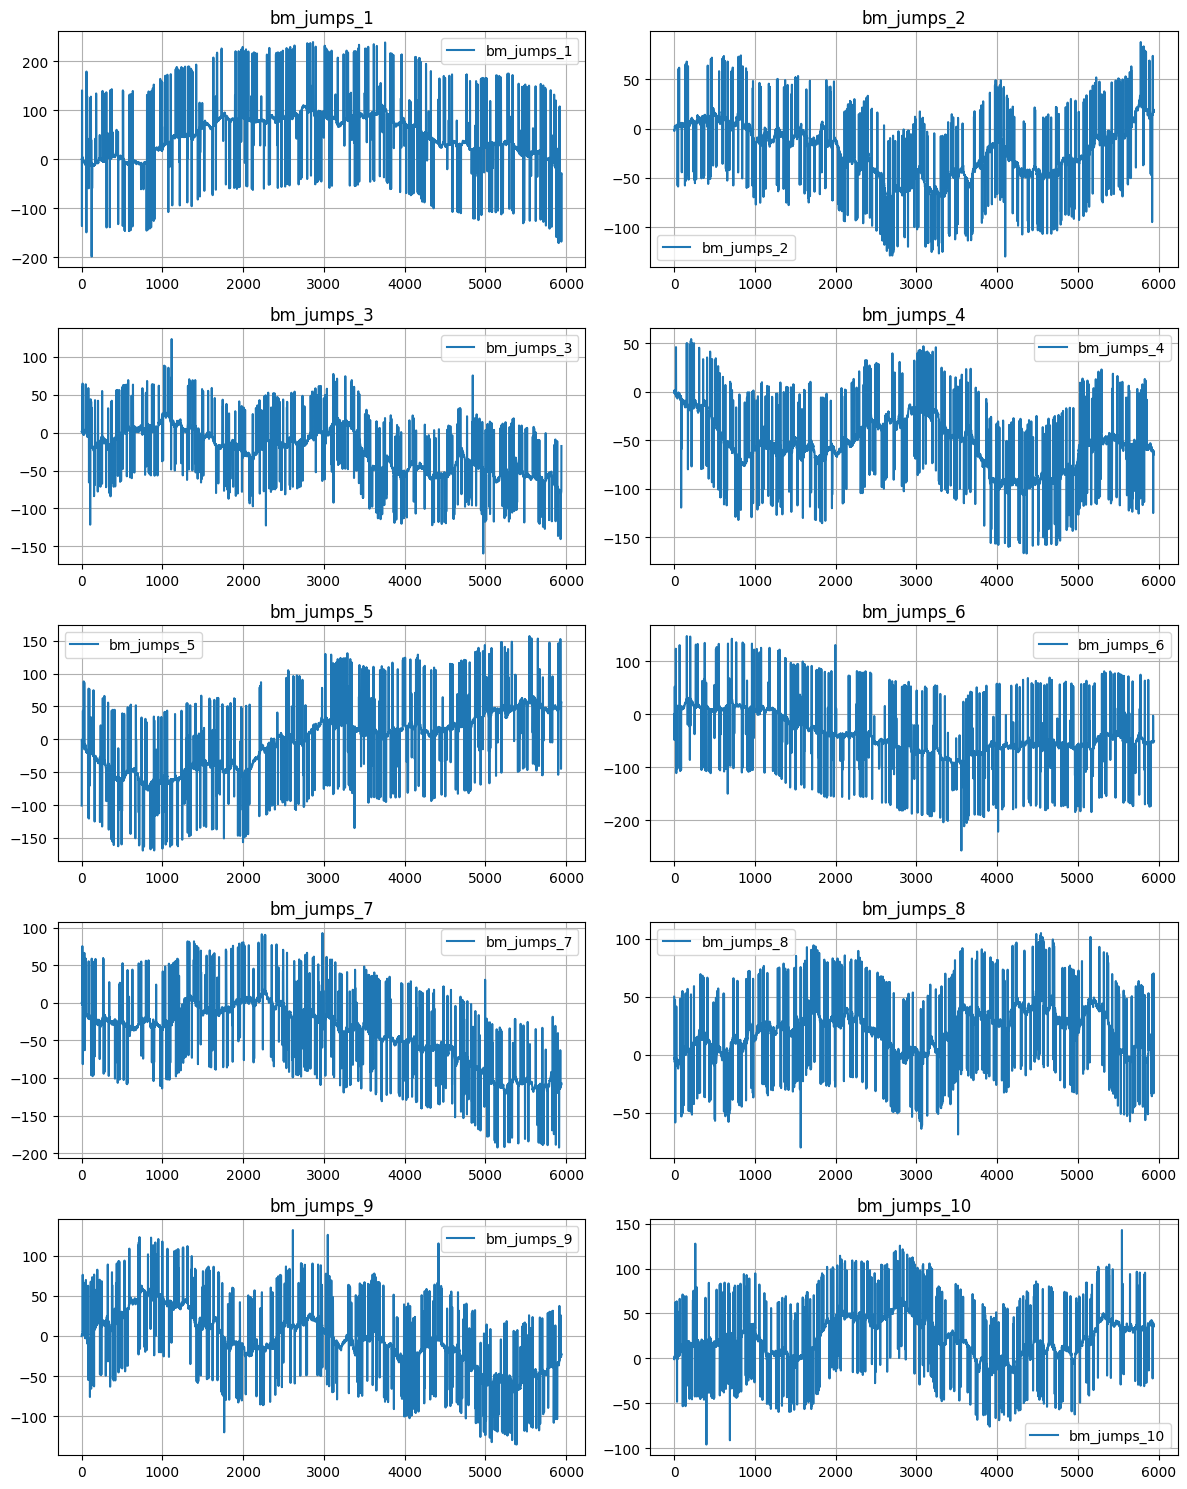

In [10]:
# Criar figura e subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Plotar cada série em um subplot
for i, col in enumerate(df.columns):
    axes[i].plot(df_outliers[col], label=col, linewidth=1.5)
    axes[i].set_title(col)
    axes[i].legend()
    axes[i].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [11]:
################################
##### Detecção de outliers #####
################################

# Calcular o percentual de outliers para cada série
percentuais_outliers = {col: calcular_percentual_outliers(df_outliers[col]) for col in df_outliers.columns}

# Criar DataFrame com os resultados
df_detectOutliers = pd.DataFrame.from_dict(percentuais_outliers, orient='index', columns=['% Outliers']).round(2)
df_detectOutliers

,% Outliers
bm_jumps_1,2.57
bm_jumps_2,1.01
bm_jumps_3,0.24
bm_jumps_4,2.54
bm_jumps_5,1.06
bm_jumps_6,3.20
bm_jumps_7,1.25
bm_jumps_8,3.06
bm_jumps_9,1.60
bm_jumps_10,2.86


# 3. Exportação dos dados

In [12]:
# Envio do DataFrame para um arquivo Excel
file_path = '[BM Jumps] Geração de séries temporais.xlsx'
df.to_excel(file_path, index=False)
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>